# Clustering 2D Basketball Poses

In [1]:
import json
import os
import glob
import numpy as np
import pandas as pd
import pdb
from tempfile import NamedTemporaryFile
from IPython.display import HTML
from matplotlib import animation
import imageio
import matplotlib.pyplot as plt
import tempfile
import random
import os
%matplotlib inline

In [2]:
## setting up some file location info.
label_rootdir = 'C:/Users/JENNY/Desktop/Jenny Sokolsky/Cal Junior year/Data X/Pose Data/labels/{}/{}/{}/{}.json'
image_rootdir = 'C:/Users/JENNY/Desktop/Jenny Sokolsky/Cal Junior year/Data X/Pose Data/frames/{}/{}/{}/{}'
coco_joint_names = [
        'R Ankle', 'R Knee', 'R Hip', 'L Hip', 'L Knee', 'L Ankle', 'R Wrist',
        'R Elbow', 'R Shoulder', 'L Shoulder', 'L Elbow', 'L Wrist', 'Neck',
        'Head', 'Nose', 'L Eye', 'R Eye', 'L Ear', 'R Ear'
    ]
game_code = '1571133'

label_rootdir = 'C:/Users/JENNY/Desktop/Jenny Sokolsky/Cal Junior year/Data X/Pose Data/labels/'

json_list = []
#for game_code in os.listdir(label_rootdir):

for shot_type in ["made", "miss"]:
    for sequence in sorted(os.listdir(os.path.join(label_rootdir, game_code, shot_type))):
        for frame in sorted(os.listdir(os.path.join(label_rootdir, game_code, shot_type, sequence)))[20:160:10]:
            json_file_path = os.path.join(label_rootdir, game_code, shot_type, sequence, frame)
            json_list.append(json_file_path)
print('done?')

done?


In [3]:
sorted(os.listdir(os.path.join(label_rootdir, game_code, shot_type, sequence)))

['240543782.json',
 '240543783.json',
 '240543784.json',
 '240543785.json',
 '240543786.json',
 '240543787.json',
 '240543788.json',
 '240543789.json',
 '240543790.json',
 '240543791.json',
 '240543792.json',
 '240543793.json',
 '240543794.json',
 '240543795.json',
 '240543796.json',
 '240543797.json',
 '240543798.json',
 '240543799.json',
 '240543800.json',
 '240543801.json',
 '240543802.json',
 '240543803.json',
 '240543804.json',
 '240543805.json',
 '240543806.json',
 '240543807.json',
 '240543808.json',
 '240543809.json',
 '240543810.json',
 '240543811.json',
 '240543812.json',
 '240543813.json',
 '240543814.json',
 '240543815.json',
 '240543816.json',
 '240543817.json',
 '240543818.json',
 '240543819.json',
 '240543820.json',
 '240543821.json',
 '240543822.json',
 '240543823.json',
 '240543824.json',
 '240543825.json',
 '240543826.json',
 '240543827.json',
 '240543828.json',
 '240543829.json',
 '240543830.json',
 '240543831.json',
 '240543832.json',
 '240543833.json',
 '240543834.

#  Clustering

Creating training set...

In [4]:
joint_list = ['Head','Neck','L Ankle','L Elbow','L Hip','L Knee','L Shoulder','L Wrist','R Ankle','R Elbow','R Hip','R Knee','R Shoulder','R Wrist']
xy = []
for label_file in json_list:
    with open(label_file,'r') as f:
        label = json.load(f)
    x = [label[j]['x'] for j in joint_list]
    y = [label[j]['y'] for j in joint_list]
    ## center and scale the pose..
    x_hip = (x[joint_list.index('L Hip')]+x[joint_list.index('R Hip')])/2.
    y_hip = (y[joint_list.index('L Hip')]+y[joint_list.index('R Hip')])/2.
    scale = max(y)-min(y)
    x = [(xi-x_hip)/scale for xi in x]
    y = [(yi-y_hip)/scale for yi in y]
    
    xy.append(x+y)
print('done?')

done?


In [5]:
(y[joint_list.index('L Hip')]+y[joint_list.index('R Hip')])/2.

0.0

In [6]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(xy, test_size=0.2)

kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(xy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [17]:
cluster_centers[0].reshape((2,-1))

array([[ 7.96681630e-02,  4.18378106e-02, -2.44618280e-02,
         9.77967516e-02,  4.94562197e-02, -8.37246083e-02,
         1.02887434e-01,  2.23873576e-02, -9.64554027e-02,
        -8.04368332e-02, -4.94562197e-02, -1.59922977e-01,
        -4.92638056e-05, -1.62371753e-01],
       [-4.18457753e-01, -2.94439639e-01,  4.76042216e-01,
        -3.08691282e-02,  1.47931513e-02,  2.47685109e-01,
        -2.08709750e-01,  3.38424377e-02,  4.32439720e-01,
        -4.00171764e-01, -1.47931513e-02,  2.16689124e-01,
        -3.38099036e-01, -5.08900451e-01]])

[-1, 1, 1, -1]

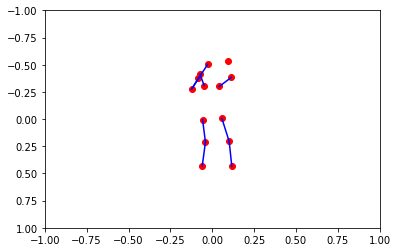

In [26]:
## plot a skeleton
skel = np.reshape(cluster_centers[6],(2,-1))

plt.plot(skel[0],skel[1],'ro')
plt.plot(skel[0][0:2],skel[1][0:2],'b-')
# left leg
plt.plot(skel[0][np.array([2,5])],skel[1][np.array([2,5])],'b-')
plt.plot(skel[0][np.array([4,5])],skel[1][np.array([4,5])],'b-')
# right leg
plt.plot(skel[0][np.array([8,11])],skel[1][np.array([8,11])],'b-')
plt.plot(skel[0][np.array([10,11])],skel[1][np.array([10,11])],'b-')
# left arm
plt.plot(skel[0][np.array([3,7])],skel[1][np.array([3,7])],'b-')
plt.plot(skel[0][np.array([3,6])],skel[1][np.array([3,6])],'b-')
# right arm
plt.plot(skel[0][np.array([9,12])],skel[1][np.array([9,12])],'b-')
plt.plot(skel[0][np.array([3,6])],skel[1][np.array([3,6])],'b-')

plt.axis([-1, 1, 1,-1])
#fig, skel = plt.subplots(6, 5, figsize=(20,15))

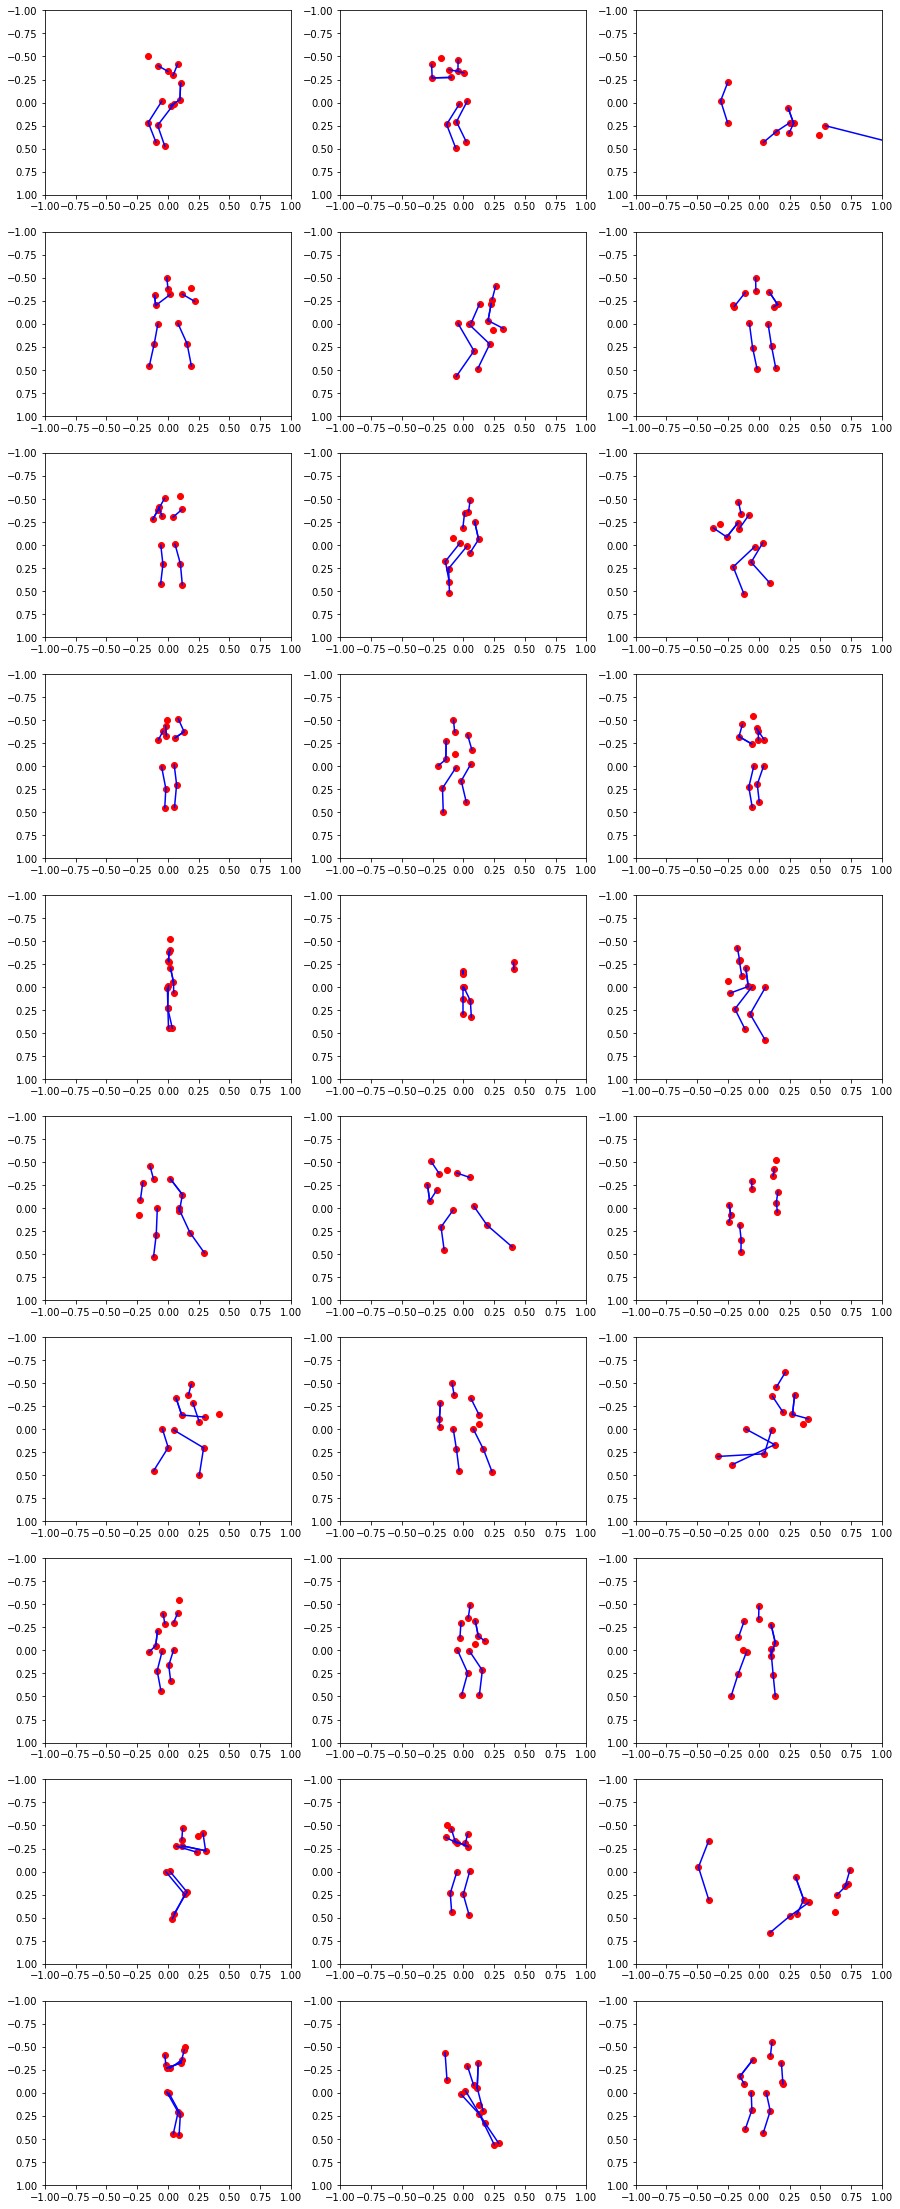

In [42]:
#fig, ax = plt.subplots(10,3, figsize=(15,30))
counter=1
f = plt.figure(figsize=(15,40))
for i in range(1,11):
    for j in range(1,4):
        f.add_subplot(10,3,counter)
        skel = np.reshape(np.array(cluster_centers[counter-1]),(2,-1))

        plt.plot(skel[0],skel[1],'ro')
        plt.plot(skel[0][0:2],skel[1][0:2],'b-')
        # left leg
        plt.plot(skel[0][np.array([2,5])],skel[1][np.array([2,5])],'b-')
        plt.plot(skel[0][np.array([4,5])],skel[1][np.array([4,5])],'b-')
        # right leg
        plt.plot(skel[0][np.array([8,11])],skel[1][np.array([8,11])],'b-')
        plt.plot(skel[0][np.array([10,11])],skel[1][np.array([10,11])],'b-')
        # left arm
        plt.plot(skel[0][np.array([3,7])],skel[1][np.array([3,7])],'b-')
        plt.plot(skel[0][np.array([3,6])],skel[1][np.array([3,6])],'b-')
        # right arm
        plt.plot(skel[0][np.array([9,12])],skel[1][np.array([9,12])],'b-')
        plt.plot(skel[0][np.array([3,6])],skel[1][np.array([3,6])],'b-')
        plt.axis([-1, 1, 1,-1])
        counter += 1

In [43]:
kmeans.cluster_centers_[0]

array([249.96153846, 435.57692308, 254.5       , 402.53846154,
       239.        , 374.53846154, 232.57692308, 375.80769231,
       242.84615385, 399.96153846, 235.53846154, 430.96153846,
       256.46153846, 335.96153846, 252.96153846, 343.69230769,
       244.34615385, 334.96153846, 227.42307692, 333.5       ,
       233.46153846, 338.92307692, 241.38461538, 335.76923077,
       237.42307692, 327.88461538, 235.48076923, 311.63461538])

In [44]:
df_features = []
for joint in coco_joint_names:
    df_features.append(f"{joint}x")
    df_features.append(f"{joint}y")
df = pd.DataFrame(columns=df_features)
for label_file in json_list:
    with open(label_file, 'rb') as f:
        label = json.load(f)
    new_line = []
    for joint in coco_joint_names:
        new_line.append(label[joint]['x'])
        new_line.append(label[joint]['y'])
    df = df.append(pd.DataFrame([new_line], columns=df_features))
df = df.reset_index().drop(['index'], axis=1)
print('done??')

done??


Running clustering...

In [45]:
df.size

23408

In [46]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X = df[['R Anklex', 'R Ankley', 'R Kneex', 'R Kneey', 'R Hipx', 'R Hipy',
       'L Hipx', 'L Hipy', 'L Kneex', 'L Kneey', 'L Anklex', 'L Ankley',
       'R Wristx', 'R Wristy', 'R Elbowx', 'R Elbowy', 'R Shoulderx',
       'R Shouldery', 'L Shoulderx', 'L Shouldery', 'L Elbowx', 'L Elbowy',
       'L Wristx', 'L Wristy', 'Neckx', 'Necky', 'Headx', 'Heady']]
x_train, x_test = train_test_split(X, test_size=0.2)

kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)